# BITS F312 - Neural Network and Fuzzy Logic



## Assignment 1

### Q1
Implement linear regression (LR) approach using batch gradient descent (BGD),
stochastic gradient descent (SGD), and mini-batch gradient descent (MBGD)
algorithms. Show the cost-function vs. epoch plots for LR with BGD, LR with SGD,
and LR with MBGD models. Show the contour plots for cost function vs. w1 vs. w2
evaluated using LR with BGD, LR with SGD, and LR with MBGD models. For Q1,
the data-q1.xlsx file must be used. The data q1.xlsx file contains two inputs and one output. You can consider w1 and w2 are the weight values of features.

In [ ]:
# importing libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# connecting gdrive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# finding out current working directory
!pwd

/content


In [ ]:
# changing directory to - 'drive/MyDrive/NNFL/Data_A1/'
%cd drive/MyDrive/NNFL/Data_A1/

/content/drive/MyDrive/NNFL/Data_A1


### Linear Regression using Batch Gradient Descent 

In [ ]:
# value predicted from current weights
def pred_BGD(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_BGD(y, x, w):
  pred_val = pred_BGD(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_BGD(x, y, w, alpha = 0.001):
  w = w - alpha*(np.sum((pred_BGD(x,w)-y).dot(x)))/(x.shape[0])
  return w

In [ ]:
# Batch Gradient Function
def BGD(filename):
  datasetQ1 = pd.read_excel(filename) # dataset for Q1

  X = (np.array([np.ones(len(datasetQ1)),datasetQ1['Feature 1'], datasetQ1['Feature 2']])).T # Extracting the X vector from the dataset 
  Y = (np.array(datasetQ1['Output'])).T # Extracting the Y vector
  
  # randomizing intial values of the weights
  W = (np.random.randn(3)).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch
  w1 = [] # to save the w1 weight for each epoch
  w2 = [] # to save the w2 weight for each epoch

  EPOCH = 100
  for iteration in range(EPOCH):
    costs.append(cost_BGD(Y,X,W))
    w1.append(W[1])
    w2.append(W[2])
    W = update_BGD(X,Y,W)
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, w1, w2, W 

In [ ]:
# defining plotting style
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (14, 14)

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_BGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_BGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Batch Gradient Descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20

#### Output

In [ ]:
costs_BGD, w1_BGD, w2_BGD, W_BGD  = BGD('data_q1.xlsx')

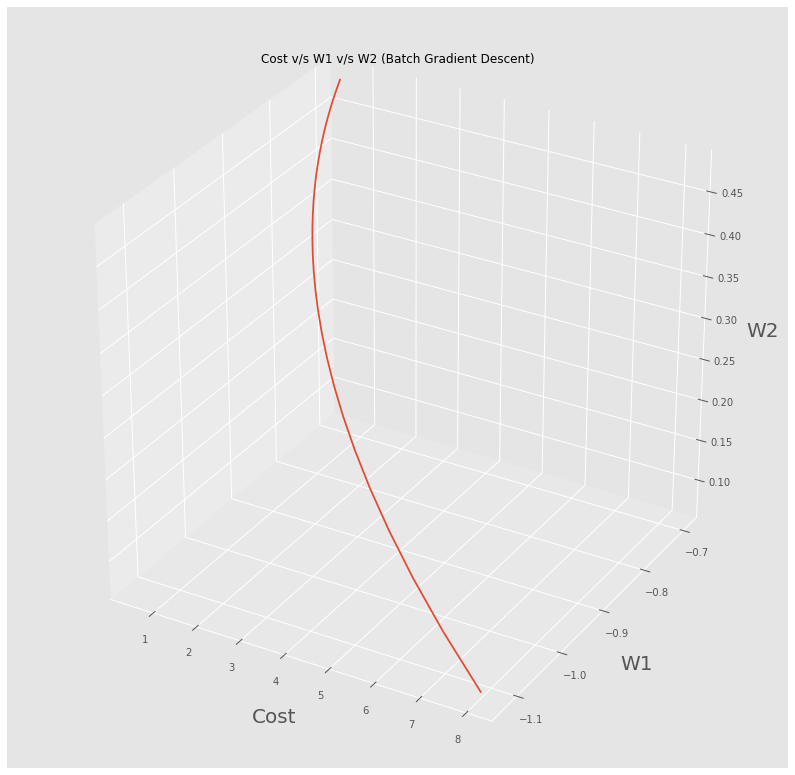

In [ ]:
plot_BGD_costW1W2(costs_BGD, w1_BGD, w2_BGD)

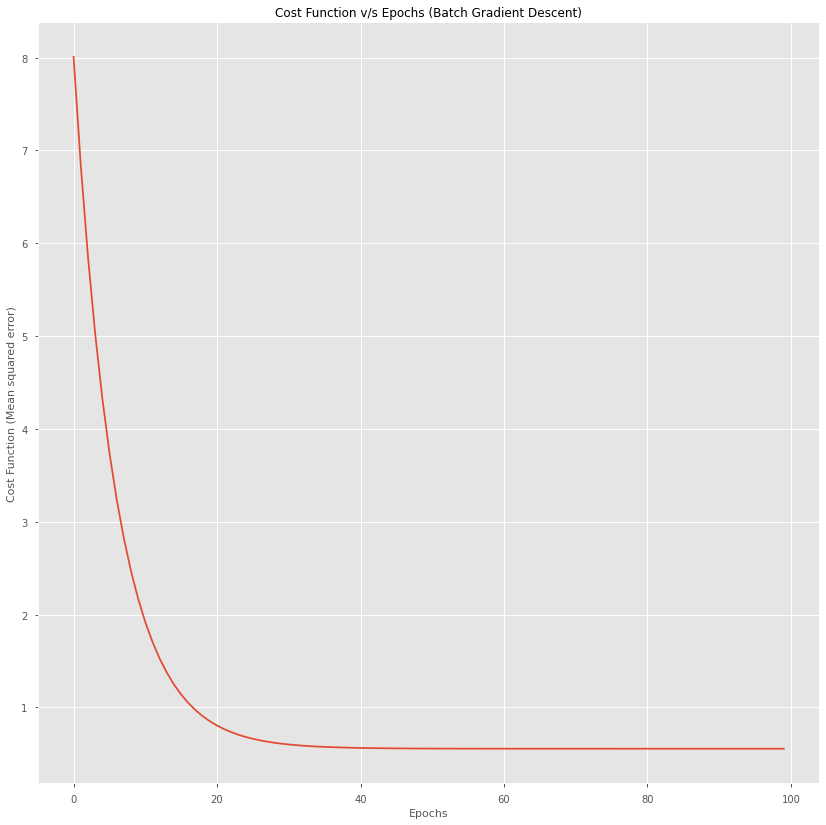

In [ ]:
plot_costs_BGD(costs_BGD)

### Linear Regression using Stochastic Gradient Descent

In [ ]:
# value predicted from current weights
def pred_SGD(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_SGD(y, x, w):
  pred_val = pred_SGD(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_SGD(x, y, w, alpha = 0.001):
  idx = np.random.randint(0,x.shape[0])
  w = w - alpha*(np.sum((pred_SGD(x[idx],w)-y[idx])*(x[idx])))/(x.shape[0])
  return w

In [ ]:
# Batch Gradient Function
def SGD(filename):
  datasetQ1 = pd.read_excel(filename) # dataset for Q1

  X = (np.array([np.ones(len(datasetQ1)),datasetQ1['Feature 1'], datasetQ1['Feature 2']])).T # Extracting the X vector from the dataset 
  Y = (np.array(datasetQ1['Output'])).T # Extracting the Y vector
  
  # randomizing intial values of the weights
  W = (np.random.randn(3)).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch
  w1 = [] # to save the w1 weight for each epoch
  w2 = [] # to save the w2 weight for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_SGD(Y,X,W))
    w1.append(W[1])
    w2.append(W[2])
    W = update_SGD(X,Y,W)
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, w1, w2, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_SGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Stochastic gradient descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_SGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Stochastic gradient descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20


#### Output

In [ ]:
costs_SGD, w1_SGD, w2_SGD, W_SGD  = SGD('data_q1.xlsx')

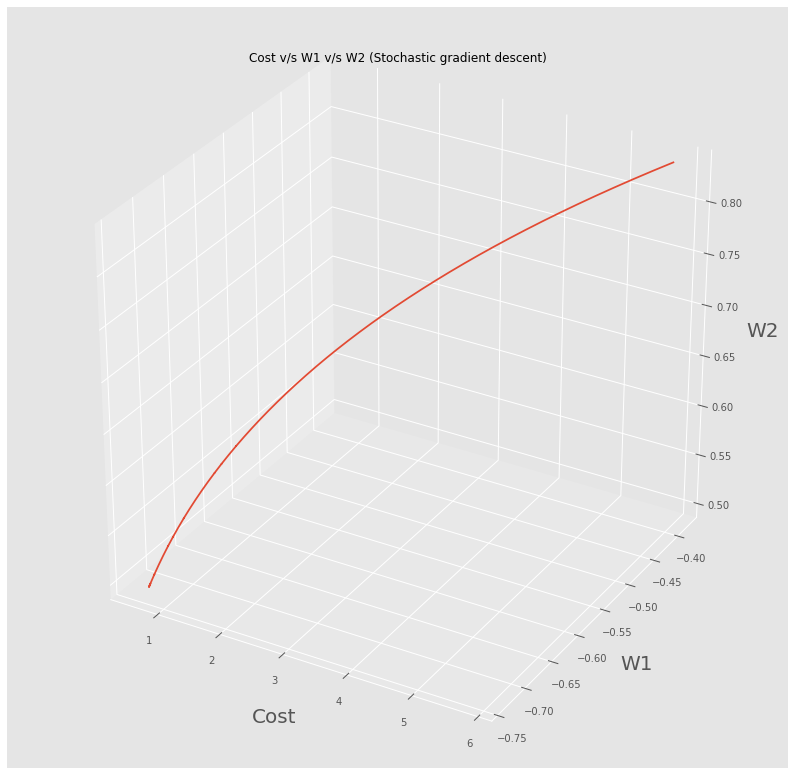

In [ ]:
plot_SGD_costW1W2(costs_SGD, w1_SGD, w2_SGD)

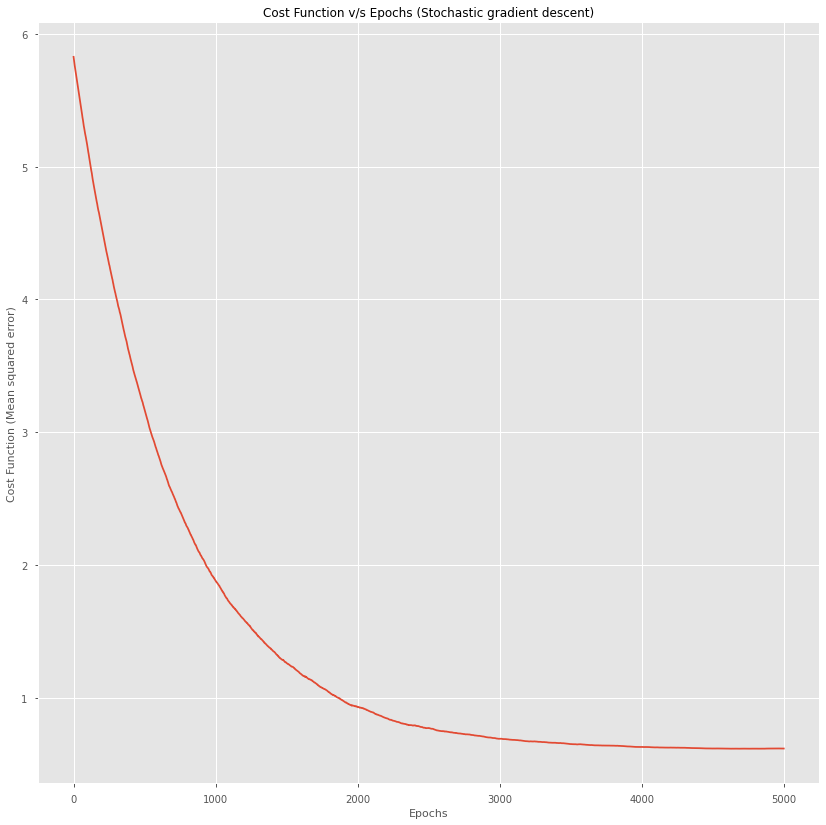

In [ ]:
plot_costs_SGD(costs_SGD)

### Linear Regression using Mini Batch Gradient Descent

In [ ]:
# value predicted from current weights
def pred_MBGD(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_MBGD(y, x, w):
  pred_val = pred_MBGD(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
def update_MBGD(data, w, batch_size = 32, alpha = 0.001):
  # Making Random Mini Batch
  idx = np.random.randint(115, size=32)

  w = w - alpha*(np.sum((pred_MBGD(data[idx, :3],w)-data[idx, 3]).dot(data[idx, :3])))/((data[idx, :3]).shape[0])
  
  return w

In [ ]:
# Batch Gradient Function
def MBGD(filename):
  datasetQ1 = pd.read_excel(filename) # dataset for Q1

  X = (np.array([np.ones(len(datasetQ1)),datasetQ1['Feature 1'], datasetQ1['Feature 2']])).T # Extracting the X vector from the dataset 
  Y = (np.array(datasetQ1['Output'])).T # Extracting the Y vector
  
  # randomizing intial values of the weights
  W = (np.random.randn(3)).T

  X0 = X[:, 0]
  X1 = X[:, 1]
  X2 = X[:, 2]

  data = np.column_stack((X0, X1, X2, Y))


  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch
  w1 = [] # to save the w1 weight for each epoch
  w2 = [] # to save the w2 weight for each epoch

  EPOCH = 1000
  for iteration in range(EPOCH):
    costs.append(cost_MBGD(Y, X, W))
    w1.append(W[1])
    w2.append(W[2])
    W = update_MBGD(data,W,ALPHA)
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, w1, w2, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_MBGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Mini Batch Gradient Descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20


In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_MBGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Mini Batch Gradient Descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20


### Output

In [ ]:
costs_MBGD, w1_MBGD, w2_MBGD, W_MBGD  = MBGD('data_q1.xlsx')

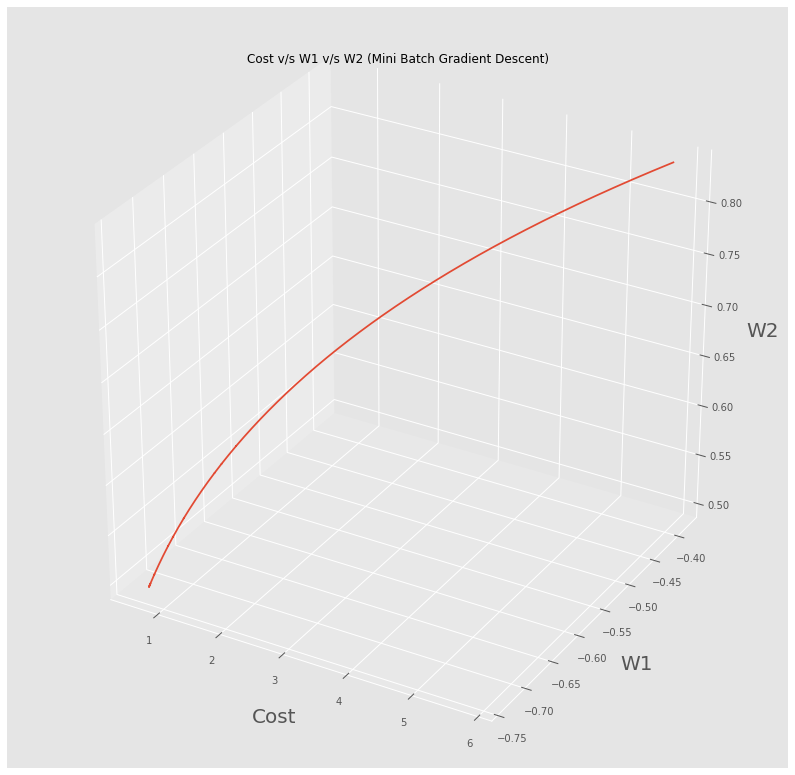

In [ ]:
plot_MBGD_costW1W2(costs_SGD, w1_SGD, w2_SGD)

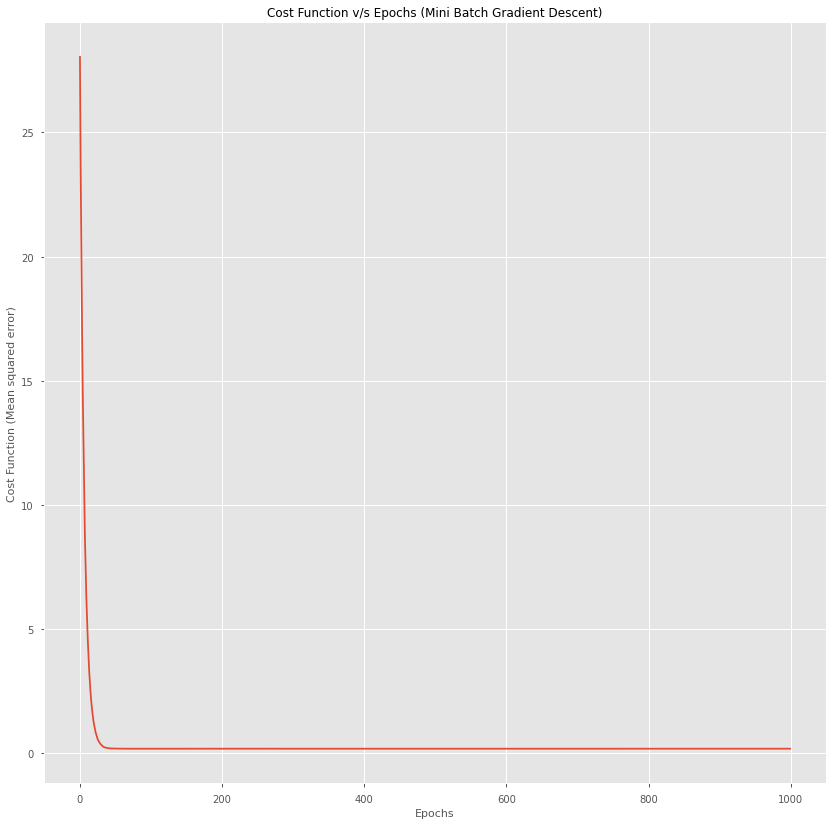

In [ ]:
plot_costs_MBGD(costs_MBGD)